In [1]:
import pandas as pd

base_path = './data/multi_step_result/'

compounds = ['avenacinA1',
             'afrormosin',
             'momilactoneB',
            #  'brucine',
             'vincamine',
            #  'falcarindiol',
             'lycosantalonol',
             'diaboline']

models = ['biochem', 'TL700_1000x']

for compound in compounds:
    for model in models:
        data = []

        with open(base_path + compound + '_' + model + '.txt') as f:
            for linha in f:
                linha = linha.strip()
                elementos = linha.split('>')
                elementos = [el.split('|')[0] for el in elementos]
                data.append(elementos)

        num_colunas = max(len(linha) for linha in data)

        data = [linha + [None] * (num_colunas - len(linha)) for linha in data]

        df = pd.DataFrame(data, columns=[f"Elemento {i+1}" for i in range(num_colunas)])

        df.to_csv(base_path + compound + '_' + model + '.csv', index=False)

In [2]:
def load_and_prepare_df(compound, model):
    df = pd.read_csv(base_path + f'{compound}_{model}.csv')
    df.insert(0, 'Model', model)
    return df

combined_dfs = {}

for compound in compounds:
    dfs = []
    
    for model in models:
        df = load_and_prepare_df(compound, model)
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    
    combined_dfs[compound] = combined_df

df_avenacinA1 = combined_dfs['avenacinA1']
df_afrormosin = combined_dfs['afrormosin']
df_momilactoneB = combined_dfs['momilactoneB']
# df_brucine = combined_dfs['brucine']
df_vincamine = combined_dfs['vincamine']
# df_falcarindiol = combined_dfs['falcarindiol']
df_lycosantalonol = combined_dfs['lycosantalonol']
df_diaboline = combined_dfs['diaboline']

In [3]:
import pandas as pd

base_path = './data/multi_step_result/'

compounds = ['avenacinA1',
             'afrormosin',
             'momilactoneB',
             'brucine',
             'vincamine',
             'falcarindiol',
             'lycosantalonol',
             'diaboline']

models = ['ensemble']

for compound in compounds:
    for model in models:
        data = []

        with open(base_path + compound + '_' + model + '.txt') as f:
            for linha in f:
                linha = linha.strip()
                elementos = linha.split('>')
                elementos = [el.split('|')[0] for el in elementos]
                data.append(elementos)

        num_colunas = max(len(linha) for linha in data)

        data = [linha + [None] * (num_colunas - len(linha)) for linha in data]

        df = pd.DataFrame(data, columns=[f"Elemento {i+1}" for i in range(num_colunas)])

        df.to_csv(base_path + compound + '_' + model + '.csv', index=False)

def load_and_prepare_df(compound, model):
    df = pd.read_csv(base_path + f'{compound}_{model}.csv')
    df.insert(0, 'Model', model)
    return df

df_afrormosin_ensemble = load_and_prepare_df('afrormosin', 'ensemble')
df_momilactoneB_ensemble = load_and_prepare_df('momilactoneB', 'ensemble')
df_brucine_ensemble = load_and_prepare_df('brucine', 'ensemble')
# df_falcarindiol_ensemble = load_and_prepare_df('falcarindiol', 'ensemble')
df_diaboline_ensemble = load_and_prepare_df('diaboline', 'ensemble')
# df_vincamine_ensemble = load_and_prepare_df('vincamine', 'ensemble')
df_lycosantalonol_ensemble = load_and_prepare_df('lycosantalonol', 'ensemble')
df_avenacinA1_ensemble = load_and_prepare_df('avenacinA1', 'ensemble')

In [4]:
import pandas as pd

base_path = './data/multi_step_result/unknown_compounds/'

compounds = ['arecoline',
            'calystegineB1',
            'guvacine']

models = ['TL700_1000x']

for compound in compounds:
    for model in models:
        data = []

        with open(base_path + compound + '_' + model + '.txt') as f:
            for linha in f:
                linha = linha.strip()
                elementos = linha.split('>')
                elementos = [el.split('|')[0] for el in elementos]
                data.append(elementos)

        num_colunas = max(len(linha) for linha in data)

        data = [linha + [None] * (num_colunas - len(linha)) for linha in data]

        df = pd.DataFrame(data, columns=[f"Elemento {i+1}" for i in range(num_colunas)])

        df.to_csv(base_path + compound + '_' + model + '.csv', index=False)

def load_and_prepare_df(compound, model):
    df = pd.read_csv(base_path + f'{compound}_{model}.csv')
    df.insert(0, 'Model', model)
    return df

df_arecoline = load_and_prepare_df('arecoline', 'TL700_1000x')
df_calystegineB1 = load_and_prepare_df('calystegineB1', 'TL700_1000x')
df_guvacine = load_and_prepare_df('guvacine', 'TL700_1000x')

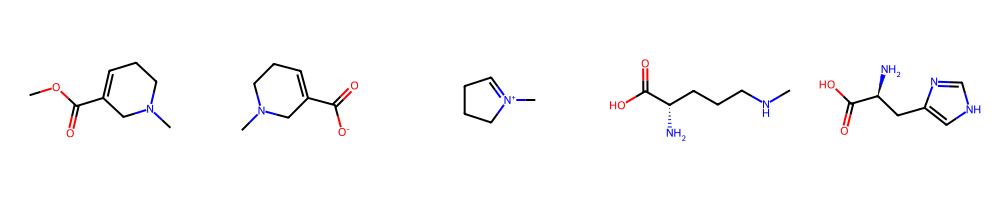

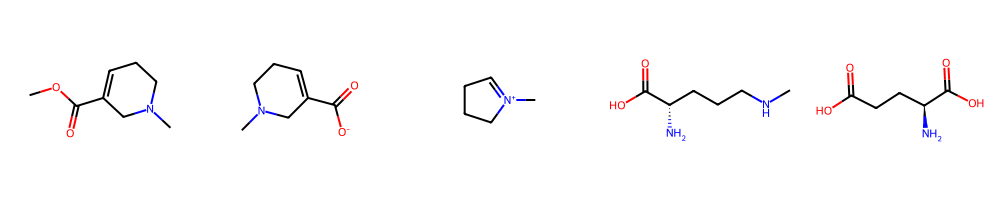

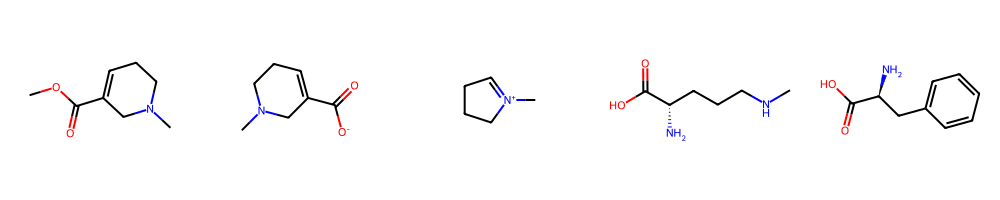

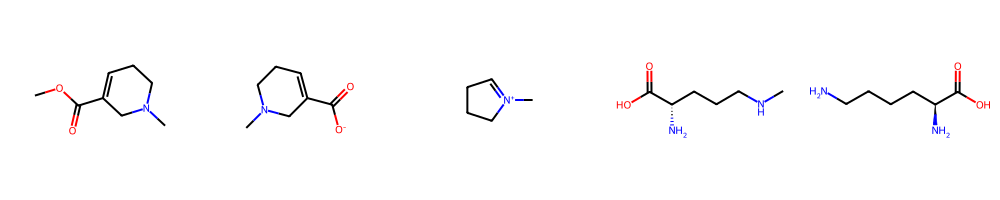

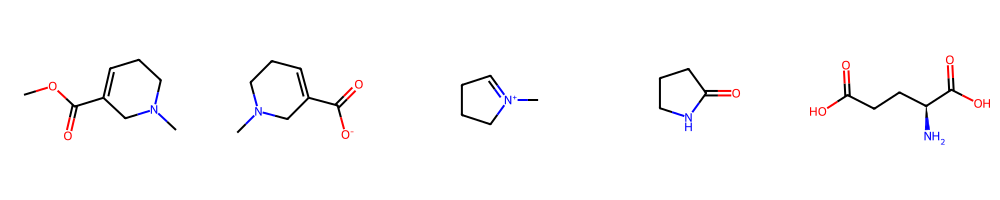

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
from PIL import Image, ImageDraw

elementos = ['Elemento 1', 'Elemento 3', 'Elemento 5', 'Elemento 7', 'Elemento 9']
# elementos = ['Elemento 1', 'Elemento 3', 'Elemento 5', 'Elemento 7']

for j in range(0, len(df_arecoline)):
    mols = []
    for elemento in elementos:
        smiles = df_arecoline[elemento][j] 
        if pd.notna(smiles) and smiles:
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                mols.append(mol)

    if mols:
        img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200))
        display(img)

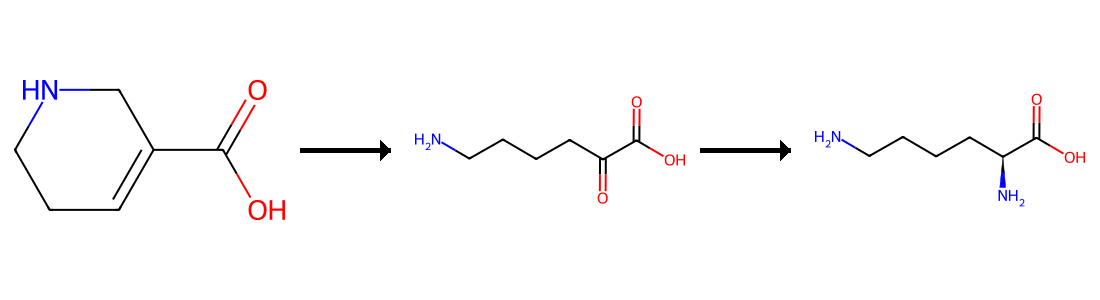

In [73]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
from PIL import Image, ImageDraw

# elementos = ['Elemento 1', 'Elemento 3', 'Elemento 5', 'Elemento 7', 'Elemento 9']
elementos = ['Elemento 1', 'Elemento 3', 'Elemento 5', 'Elemento 7']

mols = []
compound_names = []
for elemento in elementos:
    smiles = df_guvacine[elemento][0] 
    if pd.notna(smiles) and smiles:
        cid = get_cid_from_smiles(smiles)
        if cid:
                compound_name = get_compound_name_from_cid(cid)
                if compound_name:
                    compound_names.append(compound_name)
            
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            mols.append(mol)

if mols:
    mol_images = [Draw.MolToImage(mol, size=(300, 300)) for mol in mols]

def add_arrows_between_images(images):
    img_width, img_height = images[0].size
    arrow_space = 100

    total_width = len(images) * img_width + (len(images) - 1) * arrow_space
    total_height = img_height

    new_img = Image.new('RGB', (total_width, total_height), (255, 255, 255))
    draw = ImageDraw.Draw(new_img)

    x_offset = 0
    for i, img in enumerate(images):
        new_img.paste(img, (x_offset, 0))
        x_offset += img_width


        if i < len(images) - 1:
            arrow_x_start = x_offset
            arrow_x_end = x_offset + arrow_space - 10
            y_center = img_height // 2

            draw.line((arrow_x_start, y_center, arrow_x_end, y_center), fill="black", width=5)
            draw.polygon([(arrow_x_end - 10, y_center - 10), (arrow_x_end, y_center), (arrow_x_end - 10, y_center + 10)], fill="black")
            x_offset += arrow_space

    return new_img

final_img = add_arrows_between_images(mol_images)

final_img.show()

# if mols:
#     img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300, 300), legends=compound_names)
#     display(img)

In [6]:
import requests
import urllib.parse
import pandas as pd

def get_cid_from_smiles(smiles):
    smiles_encoded = urllib.parse.quote(smiles)
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/{smiles_encoded}/cids/JSON"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if 'IdentifierList' in data and 'CID' in data['IdentifierList']:
            return data['IdentifierList']['CID'][0]  
        else:
            return None

def get_compound_name_from_cid(cid):
    url_common_name = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/synonyms/JSON"
    response_common = requests.get(url_common_name)
    
    if response_common.status_code == 200:
        data_common = response_common.json()
        if 'InformationList' in data_common and 'Information' in data_common['InformationList']:
            synonyms = data_common['InformationList']['Information'][0].get('Synonym', [])
            if synonyms:
                return synonyms[0]
    
    url_iupac_name = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/IUPACName/JSON"
    response_iupac = requests.get(url_iupac_name)
    
    if response_iupac.status_code == 200:
        data_iupac = response_iupac.json()
        if 'PropertyTable' in data_iupac and 'Properties' in data_iupac['PropertyTable']:
            return data_iupac['PropertyTable']['Properties'][0]['IUPACName']
    
    return None

for index, row in df_arecoline.iterrows():
    smile = row['Elemento 9']  
    
    if pd.notna(smile) and smile: 
        cid = get_cid_from_smiles(smile)
    else:
        smile = row['Elemento 7']  
        if pd.notna(smile) and smile: 
            cid = get_cid_from_smiles(smile)
        else:
            cid = None  

    if cid:
        compound_name = get_compound_name_from_cid(cid)
        if compound_name:
            print(f"{index}: {compound_name} {smile}")

0: L-histidine N[C@@H](Cc1c[nH]cn1)C(=O)O
1: L-glutamic acid N[C@@H](CCC(=O)O)C(=O)O
2: L-phenylalanine N[C@@H](Cc1ccccc1)C(=O)O
3: L-lysine NCCCC[C@H](N)C(=O)O
4: L-glutamic acid N[C@@H](CCC(=O)O)C(=O)O


# SIMILARITY

In [37]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import TanimotoSimilarity

def calculate_tanimoto(smiles1, smiles2):
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)
    
    if mol1 is None or mol2 is None:
        print(f"Erro ao converter SMILES: {smiles1} ou {smiles2}")
        return None
    
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=2048)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=2048)
    
    similarity = TanimotoSimilarity(fp1, fp2)
    return similarity

def calculate_average_similarity(df, target_smiles, start, end, column_name='Elemento 3'):
    similarities = []
    
    for index in range(start, end+1):
        smiles = df[column_name].iloc[index]
        if pd.notna(smiles):
            similarity = calculate_tanimoto(smiles, target_smiles)
            if similarity is not None:
                similarities.append(similarity)
    
    if len(similarities) > 0:
        average_similarity = sum(similarities) / len(similarities)
        return average_similarity
    else:
        return None

## Afrormosin

In [38]:
import numpy as np

target_smiles = {
    'Elemento 3' : 'COC1=CC=C(C=C1)C2=COC3=CC(=C(C=C3C2=O)O)O', #texasin
    'Elemento 3' : 'COC1=CC=C(C=C1)C2=COC3=C(C2=O)C=CC(=C3)O', #formononetin
    'Elemento 5' : 'COC1=CC=C(C=C1)C2=COC3=C(C2=O)C=CC(=C3)O', #formononetin
    'Elemento 5' : 'C1[C@H](C(=O)C2=C(O1)C=C(C=C2)O)C3=C(C=C(C=C3)O)O', #2,4',7-trihydroxyisoflavanone
    'Elemento 7' : 'C1[C@H](C(=O)C2=C(O1)C=C(C=C2)O)C3=C(C=C(C=C3)O)O', #2,4',7-trihydroxyisoflavanone
    'Elemento 7' : 'C1[C@H](OC2=C(C1=O)C=CC(=C2)O)C3=CC=C(C=C3)O', #liquiritigenin
    'Elemento 9' : 'C1[C@H](OC2=C(C1=O)C=CC(=C2)O)C3=CC=C(C=C3)O' #liquiritigenin
}

similarity_biochem = []
similarity_TL = []
similarity_ensemble = []

for key, value in target_smiles.items():
    average_similarity_biochem = calculate_average_similarity(df_afrormosin, value, 0, 8, column_name=key)
    average_similarity_TL = calculate_average_similarity(df_afrormosin, value, 9, 18, column_name=key)
    average_similarity_ensemble = calculate_average_similarity(df_afrormosin_ensemble, value, 0, 9, column_name=key)

    if average_similarity_biochem and average_similarity_TL and average_similarity_ensemble:
        similarity_biochem.append(average_similarity_biochem)
        similarity_TL.append(average_similarity_TL)
        similarity_ensemble.append(average_similarity_ensemble)

similarity_biochem = np.mean(similarity_biochem)
similarity_TL = np.mean(similarity_TL)
similarity_ensemble = np.mean(similarity_ensemble)

In [39]:
print(f"Similaridade média (biochem): {similarity_biochem:.2f}")
print(f"Similaridade média (TL): {similarity_TL:.2f}")
print(f"Similaridade média (ensemble): {similarity_ensemble:.2f}")

Similaridade média (biochem): 0.31
Similaridade média (TL): 0.34
Similaridade média (ensemble): 0.25


## MomilactoneB

In [41]:
import numpy as np

target_smiles = {
    'Elemento 3' : 'C[C@]4(CC[C@@H]1C(=C[C@@H]3[C@@H]2[C@@]1(CCC[C@@]2(C(=O)O3)C)C)C4)C=C', #Syn-pimaradiene-19,6b-olide
    'Elemento 3' : 'C[C@]1(CCC2C(=CCC3[C@@]2(CCCC3(C)C)C)C1)C=C', #syn-Pimaradiene
    'Elemento 5' : 'C[C@]1(CCC2C(=CCC3[C@@]2(CCCC3(C)C)C)C1)C=C', #syn-Pimaradiene
    'Elemento 5' : 'CC(=CCC/C(=C/CC/C(=C/CC/C(=C/COP(=O)(O)OP(=O)(O)O)/C)/C)/C)C', # GGPP
    'Elemento 5' : 'C/C(=C\COP(=O)(O)OP(=O)(O)O)/CC[C@@H]1C(=C)CC[C@@H]2[C@@]1(CCCC2(C)C)C', #syn-Copalyl diphosphate
    'Elemento 7' : 'C/C(=C\COP(=O)(O)OP(=O)(O)O)/CC[C@@H]1C(=C)CC[C@@H]2[C@@]1(CCCC2(C)C)C', #syn-Copalyl diphosphate
    'Elemento 7' : 'CC(=CCC/C(=C/CC/C(=C/CC/C(=C/COP(=O)(O)OP(=O)(O)O)/C)/C)/C)C', #GGPP
    'Elemento 9' : 'CC(=CCC/C(=C/CC/C(=C/CC/C(=C/COP(=O)(O)OP(=O)(O)O)/C)/C)/C)C' #GGPP
}

similarity_biochem = []
similarity_TL = []
similarity_ensemble = []

for key, value in target_smiles.items():
    average_similarity_biochem = calculate_average_similarity(df_momilactoneB, value, 0, 9, column_name=key)
    average_similarity_TL = calculate_average_similarity(df_momilactoneB, value, 10, 19, column_name=key)
    average_similarity_ensemble = calculate_average_similarity(df_momilactoneB_ensemble, value, 0, 9, column_name=key)

    if average_similarity_biochem and average_similarity_TL and average_similarity_ensemble:
        similarity_biochem.append(average_similarity_biochem)
        similarity_TL.append(average_similarity_TL)
        similarity_ensemble.append(average_similarity_ensemble)

similarity_biochem = np.mean(similarity_biochem)
similarity_TL = np.mean(similarity_TL)
similarity_ensemble = np.mean(similarity_ensemble)

In [42]:
print(f"Similaridade média (biochem): {similarity_biochem:.2f}")
print(f"Similaridade média (TL): {similarity_TL:.2f}")
print(f"Similaridade média (ensemble): {similarity_ensemble:.2f}")

Similaridade média (biochem): 0.32
Similaridade média (TL): 0.62
Similaridade média (ensemble): 0.24


## AvenacinA1

In [45]:
import numpy as np

target_smiles = {
    'Elemento 3' : 'CNC1=CC=CC=C1C(=O)O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O', #N-methyl anthranilate glucoside
    'Elemento 3' : 'CNC1=CC=CC=C1C(O)=O', #N-methyl anthranilate
    'Elemento 3' : 'C1=CC=C(C(=C1)C(=O)O)N', #Anthranilic acid
    'Elemento 5' : 'CNC1=CC=CC=C1C(O)=O', #N-methyl anthranilate
    'Elemento 5' : 'C1=CC=C(C(=C1)C(=O)O)N', #Anthranilic acid
    'Elemento 7' : 'CNC1=CC=CC=C1C(O)=O', #N-methyl anthranilate
    'Elemento 7' : 'C1=CC=C(C(=C1)C(=O)O)N', #Anthranilic acid
    'Elemento 9' : 'C1=CC=C(C(=C1)C(=O)O)N' #Anthranilic acid
}

similarity_biochem = []
similarity_TL = []
similarity_ensemble = []

for key, value in target_smiles.items():
    average_similarity_biochem = calculate_average_similarity(df_avenacinA1, value, 0, 9, column_name=key)
    average_similarity_TL = calculate_average_similarity(df_avenacinA1, value, 10, 19, column_name=key)
    average_similarity_ensemble = calculate_average_similarity(df_avenacinA1_ensemble, value, 0, 4, column_name=key)

    if average_similarity_biochem and average_similarity_TL and average_similarity_ensemble:
        similarity_biochem.append(average_similarity_biochem)
        similarity_TL.append(average_similarity_TL)
        similarity_ensemble.append(average_similarity_ensemble)

similarity_biochem = np.mean(similarity_biochem)
similarity_TL = np.mean(similarity_TL)
similarity_ensemble = np.mean(similarity_ensemble)

In [46]:
print(f"Similaridade média (biochem): {similarity_biochem:.2f}")
print(f"Similaridade média (TL): {similarity_TL:.2f}")
print(f"Similaridade média (ensemble): {similarity_ensemble:.2f}")

Similaridade média (biochem): 0.41
Similaridade média (TL): 0.62
Similaridade média (ensemble): 0.23


## Lycosantalonol

In [48]:
import numpy as np

target_smiles = {
    'Elemento 3' : 'CC(=CCCC1(C(O1)CCC2(C3CC4C2(C4C3)C)C)C)C', #Epoxy-Lycosantalene
    'Elemento 3' : 'CC(=CCC/C(=C\CCC1(C2CC3C1(C3C2)C)C)/C)C', #Lycosantalene
    'Elemento 3' : 'O(C/C=C(\CC/C=C(/C)\CC/C=C(\CCC=C(C)C)/C)/C)P(OP(=O)(O)O)(=O)O', #NNPP
    'Elemento 5' : 'CC(=CCCC1(C(O1)CCC2(C3CC4C2(C4C3)C)C)C)C', #Epoxy-Lycosantalene
    'Elemento 5' : 'CC(=CCC/C(=C\CCC1(C2CC3C1(C3C2)C)C)/C)C', #Lycosantalene
    'Elemento 5' : 'O(C/C=C(\CC/C=C(/C)\CC/C=C(\CCC=C(C)C)/C)/C)P(OP(=O)(O)O)(=O)O', #NNPP
    'Elemento 7' : 'O(C/C=C(\CC/C=C(/C)\CC/C=C(\CCC=C(C)C)/C)/C)P(OP(=O)(O)O)(=O)O' #NNPP
}

similarity_biochem = []
similarity_TL = []
similarity_ensemble = []

for key, value in target_smiles.items():
    average_similarity_biochem = calculate_average_similarity(df_lycosantalonol, value, 0, 9, column_name=key)
    average_similarity_TL = calculate_average_similarity(df_lycosantalonol, value, 10, 19, column_name=key)
    average_similarity_ensemble = calculate_average_similarity(df_lycosantalonol_ensemble, value, 0, 9, column_name=key)

    if average_similarity_biochem and average_similarity_TL and average_similarity_ensemble:
        similarity_biochem.append(average_similarity_biochem)
        similarity_TL.append(average_similarity_TL)
        similarity_ensemble.append(average_similarity_ensemble)

similarity_biochem = np.mean(similarity_biochem)
similarity_TL = np.mean(similarity_TL)
similarity_ensemble = np.mean(similarity_ensemble)

In [49]:
print(f"Similaridade média (biochem): {similarity_biochem:.2f}")
print(f"Similaridade média (TL): {similarity_TL:.2f}")
print(f"Similaridade média (ensemble): {similarity_ensemble:.2f}")

Similaridade média (biochem): 0.68
Similaridade média (TL): 0.73
Similaridade média (ensemble): 0.36


## Vincamine

In [51]:
import numpy as np

target_smiles = {
    'Elemento 3' : 'CC[C@]12CC(=C3[C@@]4([C@H]1N(CC4)CC=C2)C5=C(N3)C=C(C=C5)O)C(=O)OC', #16-Hydroxytabersonine
    'Elemento 3' : 'CC[C@]12CC(=C3[C@@]4([C@H]1N(CC4)CC=C2)C5=CC=CC=C5N3)C(=O)OC', #Tabersonine   
    'Elemento 3' : 'C/C=C\1/CN2CCC3=C([C@@H]2C[C@@H]1/C(=C/O)/C(=O)OC)NC4=CC=CC=C34', #19E-Geissoschizine
    'Elemento 3' : 'C[C@H]1C2=CN3CCC4=C([C@@H]3C[C@@H]2C(=CO1)C(=O)OC)NC5=CC=CC=C45', #Cathenamine 
    'Elemento 5' : 'C/C=C\1/CN2CCC3=C([C@@H]2C[C@@H]1/C(=C/O)/C(=O)OC)NC4=CC=CC=C34', #19E-Geissoschizine
    'Elemento 5' : 'C[C@H]1C2=CN3CCC4=C([C@@H]3C[C@@H]2C(=CO1)C(=O)OC)NC5=CC=CC=C45', #Cathenamine
    'Elemento 5' : 'C1=CC=C2C(=C1)C(=CN2)CCN', #Tryptamine
    'Elemento 7' : 'C1=CC=C2C(=C1)C(=CN2)CCN' #Tryptamine
}

similarity_biochem = []
similarity_TL = []
similarity_ensemble = []

for key, value in target_smiles.items():
    average_similarity_biochem = calculate_average_similarity(df_vincamine, value, 0, 8, column_name=key)
    average_similarity_TL = calculate_average_similarity(df_vincamine, value, 9, 18, column_name=key)
    average_similarity_ensemble = calculate_average_similarity(df_vincamine_ensemble, value, 0, 9, column_name=key)

    if average_similarity_biochem and average_similarity_TL and average_similarity_ensemble:
        similarity_biochem.append(average_similarity_biochem)
        similarity_TL.append(average_similarity_TL)
        similarity_ensemble.append(average_similarity_ensemble)

similarity_biochem = np.mean(similarity_biochem)
similarity_TL = np.mean(similarity_TL)
similarity_ensemble = np.mean(similarity_ensemble)

In [52]:
print(f"Similaridade média (biochem): {similarity_biochem:.2f}")
print(f"Similaridade média (TL): {similarity_TL:.2f}")
print(f"Similaridade média (ensemble): {similarity_ensemble:.2f}")

Similaridade média (biochem): 0.22
Similaridade média (TL): 0.17
Similaridade média (ensemble): 0.21


## Diaboline

In [58]:
import numpy as np

target_smiles = {
    'Elemento 3' : 'C1CN2CC3=CCO[C@H]([C@@H]4[C@H]3C[C@H]2[C@@]15[C@H]4NC6=CC=CC=C56)O', #Wieland-Gumlich aldehyde
    'Elemento 3' : 'C/C=C1/CN2CC[C@@]34[C@@H]2C[C@@H]1C(=C3NC5=CC=CC=C45)C=O', #Norfluorocurarine
    'Elemento 3' : 'C/C=C1/CN2CCC3=C([C@@H]2C[C@@H]1/C(=C/O)/C(=O)OC)NC4=CC=CC=C34', #Geissoschizine
    'Elemento 5' : 'C1CN2CC3=CCO[C@H]([C@@H]4[C@H]3C[C@H]2[C@@]15[C@H]4NC6=CC=CC=C56)O', #Wieland-Gumlich aldehyde
    'Elemento 5' : 'C/C=C1/CN2CC[C@@]34[C@@H]2C[C@@H]1C(=C3NC5=CC=CC=C45)C=O', #Norfluorocurarine
    'Elemento 5' : 'C/C=C1/CN2CCC3=C([C@@H]2C[C@@H]1/C(=C/O)/C(=O)OC)NC4=CC=CC=C34', #Geissoschizine
    'Elemento 7' : 'C/C=C1/CN2CC[C@@]34[C@@H]2C[C@@H]1C(=C3NC5=CC=CC=C45)C=O', #Norfluorocurarine
    'Elemento 7' : 'C/C=C1/CN2CCC3=C([C@@H]2C[C@@H]1/C(=C/O)/C(=O)OC)NC4=CC=CC=C34', #Geissoschizine
    'Elemento 7' : 'CC(=CCC/C(=C/COP(=O)(O)OP(=O)(O)O)/C)C', #GPP
    'Elemento 7' : 'C1=CC=C2C(=C1)C(=CN2)C[C@@H](C(=O)O)N', #Tryptophan
    'Elemento 9' : 'CC(=CCC/C(=C/COP(=O)(O)OP(=O)(O)O)/C)C', #GPP
    'Elemento 9' : 'C1=CC=C2C(=C1)C(=CN2)C[C@@H](C(=O)O)N' #Tryptophan
}

similarity_biochem = []
similarity_TL = []
similarity_ensemble = []

for key, value in target_smiles.items():
    average_similarity_biochem = calculate_average_similarity(df_diaboline, value, 0, 9, column_name=key)
    average_similarity_TL = calculate_average_similarity(df_diaboline, value, 10, 19, column_name=key)
    average_similarity_ensemble = calculate_average_similarity(df_diaboline_ensemble, value, 0, 6, column_name=key)

    if average_similarity_biochem and average_similarity_TL and average_similarity_ensemble:
        similarity_biochem.append(average_similarity_biochem)
        similarity_TL.append(average_similarity_TL)
        similarity_ensemble.append(average_similarity_ensemble)

similarity_biochem = np.mean(similarity_biochem)
similarity_TL = np.mean(similarity_TL)
similarity_ensemble = np.mean(similarity_ensemble)

In [59]:
print(f"Similaridade média (biochem): {similarity_biochem:.2f}")
print(f"Similaridade média (TL): {similarity_TL:.2f}")
print(f"Similaridade média (ensemble): {similarity_ensemble:.2f}")

Similaridade média (biochem): 0.12
Similaridade média (TL): 0.14
Similaridade média (ensemble): 0.14
